### Содержание

1. Города Англии и Уэльса   
   1.1 [Точечный график](#Scatter_plot_1)   
   1.2 [График регрессии и остатков](#Regressin_plot_1)  
   1.3 [Выводы](#Сonclusions_1)
2. Северные города  
   2.1 [Точечный график](#Scatter_plot_2)   
   2.2 [График регрессии и остатков](#Regressin_plot_2)  
   2.3 [Выводы](#Сonclusions_2)
3. Южные города  
   3.1 [Точечный график](#Scatter_plot_3)   
   3.2 [График регрессии и остатков](#Regressin_plot_3)  
   3.3 [Выводы](#Сonclusions_3)   

In [26]:
# Загружаем библиотеки:
# Для работы с данными
import pandas as pd
# Для построения графиков
import matplotlib.pyplot as plt
# Для моделей регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Загружаем данные для анализа
water = pd.read_csv('water.csv')

# Размер поля графиков
from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### Города Англии и Уэльса
#### Точечный график <a id = 'Scatter_plot_1'></a>

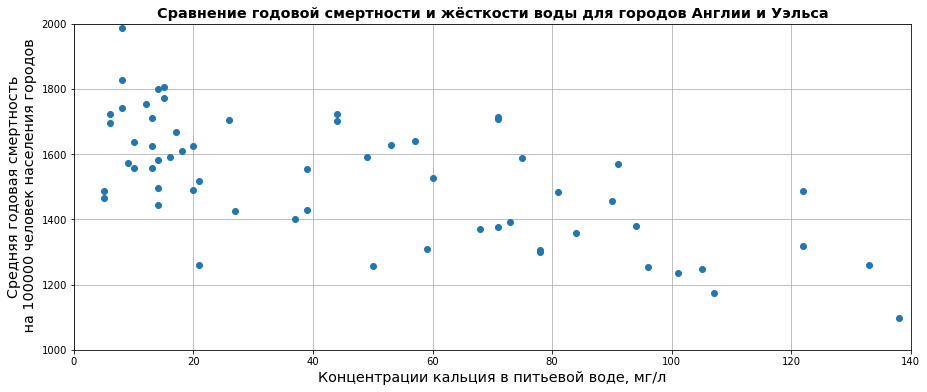

График показывает наличие корелляции между жёсткостью воды и средней годовой смертностью
Коэффициент Пирсона = -0.6548486232042464
Коэффициент Спирмена = -0.6316646189166502
Коэффициенты показывают наличие обратной взаимосвязи средней степени силы


In [59]:
# Построим точечный график
# По горизонтальной оси жёсткость воды, по вертикальной смертность

# Для дальнейшего переиспользования обернём в функцию
def scatter_plot(x_col, y_col, label = ''):
    # График
    plt.scatter(x = x_col, # По оси Х значения жёсткости воды
                y = y_col, # По оси Y значения смертности
                label = label, # Легенда
                zorder = 2
                )
    plt.grid(True) # Основная сетка   
    plt.xlim(0, 140) # Пределы горизонтальной оси     
    plt.ylim(1000, 2000) # Пределы вертикальной оси
    # Надписи по осям
    plt.xlabel('Концентрации кальция в питьевой воде, мг/л', fontsize = 'x-large')
    plt.ylabel('Средняя годовая смертность\n на 100000 человек населения городов', fontsize = 'x-large')
    return

# Строим график
scatter_plot(x_col = water['hardness'], y_col = water['mortality'])
# Заголовок для графика
plt.title('Сравнение годовой смертности и жёсткости воды для городов Англии и Уэльса', fontsize = 'x-large', fontweight = 'bold')
plt.show()
print('График показывает наличие корелляции между жёсткостью воды и средней годовой смертностью')

# Рассчитаем коэффициенты корелляции
# Коэффициент Пирсона
pearson_corr = water[['mortality', 'hardness']].corr(method = 'pearson').iloc[0, 1]
# Коэффициент Спирмена
spearman_corr = water[['mortality', 'hardness']].corr(method = 'spearman').iloc[0, 1]
print(f'Коэффициент Пирсона = {pearson_corr}\nКоэффициент Спирмена = {spearman_corr}')
print('Коэффициенты показывают наличие обратной взаимосвязи средней степени силы')

#### График регрессии и остатков <a id = 'Regressin_plot_1'></a>  

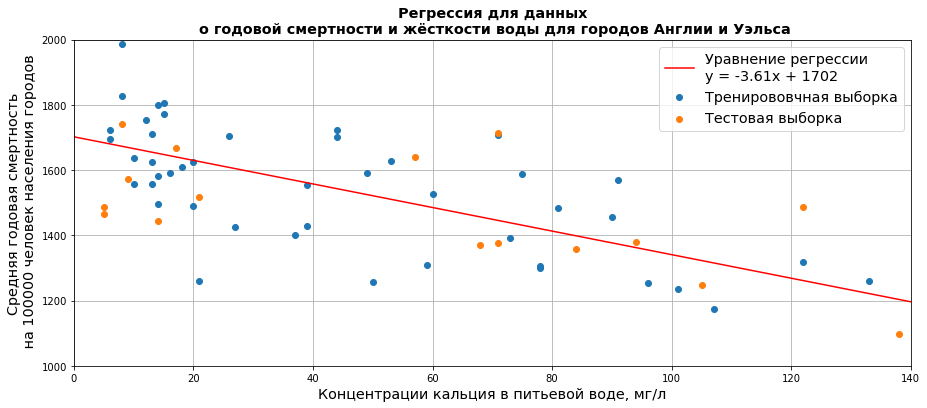

Коэффициент детерминации 0.26 показывает неудовлетворительное качество модели


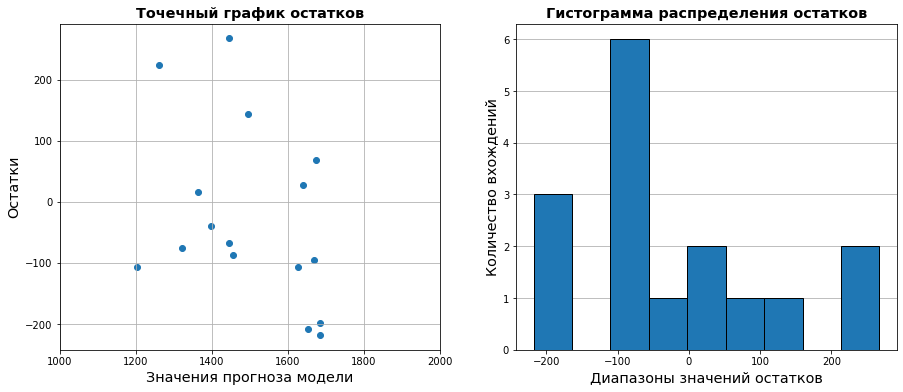

Остатки распределены равномерно, систематической составляющей не наблюдается


In [153]:
# Построим модель линейной регрессии

# Независимая переменная
X = water[['hardness']]
# Зависимая переменная
y = water['mortality']
# Разбиваем все наши данные на тренировочную (75 % от всего объёма) и тестовую (25 %) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Вызываем модель линейной регрессии и обучаем её
model = LinearRegression()
model.fit(X_train, y_train)

# Построим график тренировчных и тестовых значений
scatter_plot(x_col = X_train, y_col = y_train, label = 'Тренирововчная выборка')
scatter_plot(x_col = X_test, y_col = y_test, label = 'Тестовая выборка')
# Заголовок для графика
plt.title('Регрессия для данных\n о годовой смертности и жёсткости воды для городов Англии и Уэльса', fontsize = 'x-large', fontweight = 'bold')

# На графике покажем полученную регрессию
plt.plot([0, 140], (model.coef_*[0, 140] + model.intercept_), 
         label = f'Уравнение регрессии\ny = {round(model.coef_[0], 2)}x + {int(round(model.intercept_, 0))}',
         color = 'red'
         )
# Выведем уравнение регрессии
plt.legend(fontsize = 'x-large')
plt.show()

# Коэффициент детерминации
# изменяет значение при каждом новом запуске
k_det = round(model.score(X_test, y_test), 2)
if k_det > 0.5:
    print(f'Коэффициент детерминации {k_det} показывает удовлетворительное качество модели')
else:
    print(f'Коэффициент детерминации {k_det} показывает неудовлетворительное качество модели')

# Значения прогноза модели
y_pred = model.predict(X_test) 
# Остатки
residuals = y_test - y_pred


# Функция построения графика остатков   
def residuals_plot(y_pred, residuals):
    # Разбиваем поле графика на две части
    fig, axes = plt.subplots(nrows = 1, # Одна строка с графиками
                             ncols = 2 # В строке 2 графика
                            )
    # Точечный график остатков
    axes[0].scatter(y_pred, residuals)
    axes[0].set_xlim(1000, 2000)
    axes[0].grid()
    axes[0].set_xlabel('Значения прогноза модели', fontsize = 'x-large')
    axes[0].set_ylabel('Остатки', fontsize = 'x-large')
    axes[0].set_title('Точечный график остатков', fontsize = 'x-large', fontweight = 'bold')
    # Гистограмма остатков
    axes[1].hist(residuals, bins = 9, edgecolor = 'black', zorder = 2)
    axes[1].grid(axis = 'y')
    axes[1].set_xlabel('Диапазоны значений остатков', fontsize = 'x-large')
    axes[1].set_ylabel('Количество вхождений', fontsize = 'x-large')
    axes[1].set_title('Гистограмма распределения остатков', fontsize = 'x-large', fontweight = 'bold')    
    
# График остатков
residuals_plot(y_pred, residuals)   
plt.show()

print('Остатки распределены равномерно, систематической составляющей не наблюдается')


#### Выводы <a id = 'Сonclusions_1'></a>  
1. Наблюдается наличие взаимосвязи средней степени силы между жёсткостью воды и средней годовой смертностью для городов Англии и Уэльса.
2. Построена модель линейной регрессии. Качество модели низкое, это может быть объяснено недостаточно высокой степенью корреляции и относительно небольшим количеством исходных данных. 
3. Остатки распределены равномерно, что говорит об адекватности модели.

### Северные города
#### Точечный график <a id = 'Scatter_plot_2'></a>

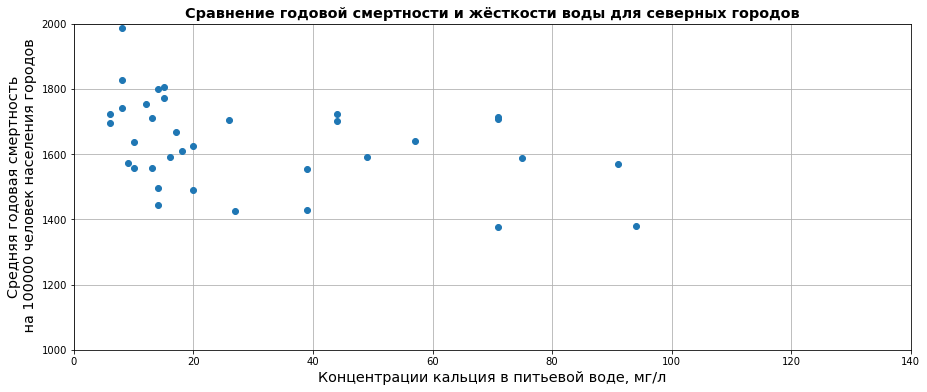

График показывает наличие корелляции между жёсткостью воды и средней годовой смертностью
Коэффициент Пирсона = -0.36859783832887183
Коэффициент Спирмена = -0.4042078956511175
Коэффициенты показывают наличие обратной взаимосвязи низкой степени силы


In [158]:
# Отберём северные города
water_north = water[water['location'] == 'North']

# Строим график
scatter_plot(x_col = water_north['hardness'], y_col = water_north['mortality'])
# Заголовок для графика
plt.title('Сравнение годовой смертности и жёсткости воды для северных городов', fontsize = 'x-large', fontweight = 'bold')
plt.show()
print('График показывает наличие корелляции между жёсткостью воды и средней годовой смертностью')

# Рассчитаем коэффициенты корелляции
# Коэффициент Пирсона
pearson_corr = water_north[['mortality', 'hardness']].corr(method = 'pearson').iloc[0, 1]
# Коэффициент Спирмена
spearman_corr = water_north[['mortality', 'hardness']].corr(method = 'spearman').iloc[0, 1]
print(f'Коэффициент Пирсона = {pearson_corr}\nКоэффициент Спирмена = {spearman_corr}')
print('Коэффициенты показывают наличие обратной взаимосвязи низкой степени силы')

#### График регрессии и остатков <a id = 'Regressin_plot_2'></a>  

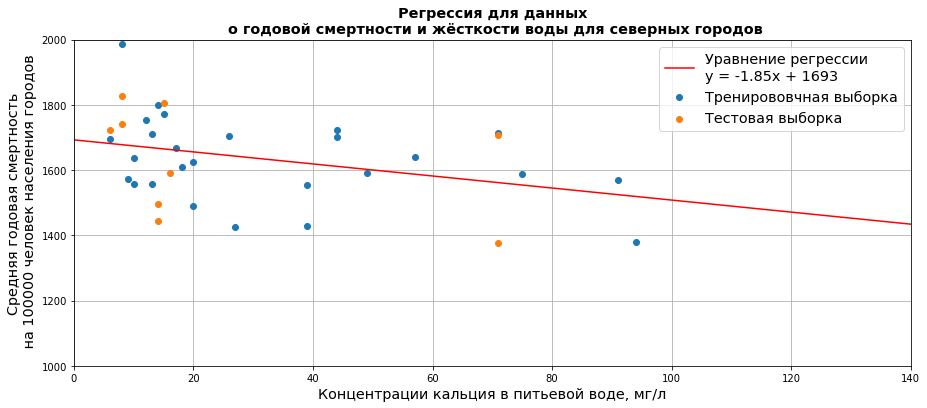

Коэффициент детерминации 0.13 показывает неудовлетворительное качество модели


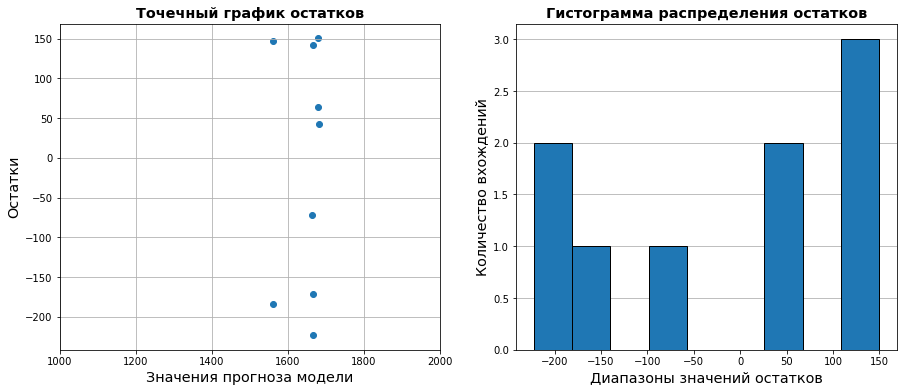

Остатки распределены равномерно, систематической составляющей не наблюдается


In [178]:
# Построим модель линейной регрессии

# Независимая переменная
X = water_north[['hardness']]
# Зависимая переменная
y = water_north['mortality']
# Разбиваем все наши данные на тренировочную (75 % от всего объёма) и тестовую (25 %) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Вызываем модель линейной регрессии и обучаем её
model = LinearRegression()
model.fit(X_train, y_train)

# Построим график тренировчных и тестовых значений
scatter_plot(x_col = X_train, y_col = y_train, label = 'Тренирововчная выборка')
scatter_plot(x_col = X_test, y_col = y_test, label = 'Тестовая выборка')
# Заголовок для графика
plt.title('Регрессия для данных\n о годовой смертности и жёсткости воды для северных городов', fontsize = 'x-large', fontweight = 'bold')

# На графике покажем полученную регрессию
plt.plot([0, 140], (model.coef_*[0, 140] + model.intercept_), 
         label = f'Уравнение регрессии\ny = {round(model.coef_[0], 2)}x + {int(round(model.intercept_, 0))}',
         color = 'red'
         )
# Выведем уравнение регрессии
plt.legend(fontsize = 'x-large')
plt.show()

# Коэффициент детерминации
# изменяет значение при каждом новом запуске
k_det = round(model.score(X_test, y_test), 2)
if k_det > 0.5:
    print(f'Коэффициент детерминации {k_det} показывает удовлетворительное качество модели')
else:
    print(f'Коэффициент детерминации {k_det} показывает неудовлетворительное качество модели')

# Значения прогноза модели
y_pred = model.predict(X_test) 
# Остатки
residuals = y_test - y_pred
    
# График остатков
residuals_plot(y_pred, residuals)   
plt.show()

print('Остатки распределены равномерно, систематической составляющей не наблюдается')

#### Выводы <a id = 'Сonclusions_2'></a>  
1. Наблюдается наличие взаимосвязи низкой степени силы между жёсткостью воды и средней годовой смертностью для северных городов.
2. Качество модели линейной регрессии низкое по причине слабой корелляции исходных данных. 
3. Остатки распределены равномерно, что говорит об адекватности модели.

### Южные города
#### Точечный график <a id = 'Scatter_plot_3'></a>

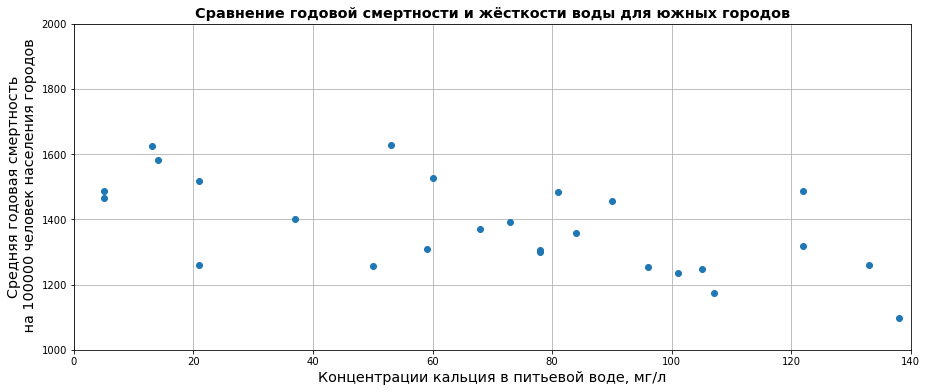

График показывает наличие корелляции между жёсткостью воды и средней годовой смертностью
Коэффициент Пирсона = -0.6021532715484159
Коэффициент Спирмена = -0.5957229185013566
Коэффициенты показывают наличие обратной взаимосвязи средней степени силы


In [182]:
# Отберём южные города
water_south = water[water['location'] == 'South']

# Строим график
scatter_plot(x_col = water_south['hardness'], y_col = water_south['mortality'])
# Заголовок для графика
plt.title('Сравнение годовой смертности и жёсткости воды для южных городов', fontsize = 'x-large', fontweight = 'bold')
plt.show()
print('График показывает наличие корелляции между жёсткостью воды и средней годовой смертностью')

# Рассчитаем коэффициенты корелляции
# Коэффициент Пирсона
pearson_corr = water_south[['mortality', 'hardness']].corr(method = 'pearson').iloc[0, 1]
# Коэффициент Спирмена
spearman_corr = water_south[['mortality', 'hardness']].corr(method = 'spearman').iloc[0, 1]
print(f'Коэффициент Пирсона = {pearson_corr}\nКоэффициент Спирмена = {spearman_corr}')
print('Коэффициенты показывают наличие обратной взаимосвязи средней степени силы')

#### График регрессии и остатков <a id = 'Regressin_plot_3'></a>  

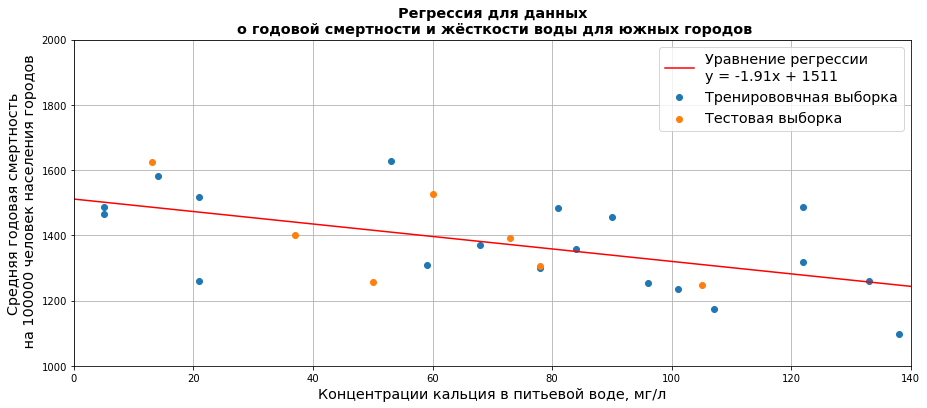

Коэффициент детерминации 0.41 показывает неудовлетворительное качество модели


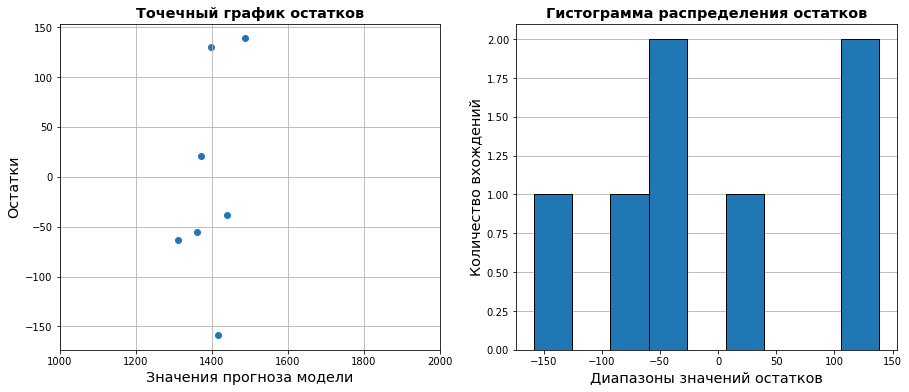

Остатки распределены равномерно, систематической составляющей не наблюдается


In [193]:
# Построим модель линейной регрессии

# Независимая переменная
X = water_south[['hardness']]
# Зависимая переменная
y = water_south['mortality']
# Разбиваем все наши данные на тренировочную (75 % от всего объёма) и тестовую (25 %) выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Вызываем модель линейной регрессии и обучаем её
model = LinearRegression()
model.fit(X_train, y_train)

# Построим график тренировчных и тестовых значений
scatter_plot(x_col = X_train, y_col = y_train, label = 'Тренирововчная выборка')
scatter_plot(x_col = X_test, y_col = y_test, label = 'Тестовая выборка')
# Заголовок для графика
plt.title('Регрессия для данных\n о годовой смертности и жёсткости воды для южных городов', fontsize = 'x-large', fontweight = 'bold')

# На графике покажем полученную регрессию
plt.plot([0, 140], (model.coef_*[0, 140] + model.intercept_), 
         label = f'Уравнение регрессии\ny = {round(model.coef_[0], 2)}x + {int(round(model.intercept_, 0))}',
         color = 'red'
         )
# Выведем уравнение регрессии
plt.legend(fontsize = 'x-large')
plt.show()

# Коэффициент детерминации
# изменяет значение при каждом новом запуске
k_det = round(model.score(X_test, y_test), 2)
if k_det > 0.5:
    print(f'Коэффициент детерминации {k_det} показывает удовлетворительное качество модели')
else:
    print(f'Коэффициент детерминации {k_det} показывает неудовлетворительное качество модели')

# Значения прогноза модели
y_pred = model.predict(X_test) 
# Остатки
residuals = y_test - y_pred
    
# График остатков
residuals_plot(y_pred, residuals)   
plt.show()

print('Остатки распределены равномерно, систематической составляющей не наблюдается')

#### Выводы <a id = 'Сonclusions_3'></a>  
1. Наблюдается наличие взаимосвязи средней степени силы между жёсткостью воды и средней годовой смертностью для южных городов.
2. Качество модели линейной регрессии низкое по причине слабой корелляции исходных данных. 
3. Остатки распределены равномерно, что говорит об адекватности модели.

Необходимо отметить, что несмотря на наличие корелляции, жёсткость воды не может оказывать влияние на уровень смертности нарямую. В противном случае наблюдалась бы различие в смертности для людей, употребляющих воду из водопровода и воду, очищенную методом обратного осмоса. Вероятно, имеет место третий параметр, например какие-то другие экологические факторы, которые оказывают влияние как на жёсткость воды, так и на уровень смертности.